In [1]:
import pandas as pd
import numpy as np
#import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import datetime
import seaborn as sns

In [5]:
file = "winequality_white.csv"

df = pd.read_csv(file)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
import numpy as np # This library allows to easily carry out simple and complex mathematical operations.
import matplotlib.pyplot as plt #Allows us to plot data, create graphs and visualize data. Perfect for your Powerpoint slides ;)
import sklearn #The one and only. This amazing library holds all the secrets. Containing powerful algorithms packed in a single line of code, this is where the magic will happen.
import sklearn.model_selection # more of sklearn. It is a big library, but trust me it is worth it.
import sklearn.preprocessing 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score,mean_absolute_error,mean_squared_error,precision_score,recall_score, accuracy_score,f1_score
from sklearn.utils import shuffle
import pandas as pd
from pandas.plotting import radviz


import random # Allows us to call random numbers, occasionally very useful.
#from google.colab import files #Allows to upload and download files directly from the browser.
import pprint#Allows us to neatly display text
from collections import OrderedDict



#Unsupervised Learning
from sklearn.neighbors import NearestNeighbors,LocalOutlierFactor
from sklearn.cluster import KMeans

In [26]:
df= df.sample(frac=1, random_state=85)
df.head(21)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
2118,6.4,0.200,0.32,3.10,0.041,18.0,126.0,0.99140,3.43,0.42,12.0,6,Medium Price
2430,6.4,0.280,0.17,8.30,0.042,61.0,195.0,0.99577,3.22,0.46,9.4,5,Low Price
225,7.1,0.240,0.41,17.80,0.046,39.0,145.0,0.99980,3.32,0.39,8.7,5,Medium Price
161,6.4,0.220,0.56,14.50,0.055,27.0,159.0,0.99800,2.98,0.40,9.1,5,Medium Price
639,5.8,0.335,0.14,5.80,0.046,49.0,197.0,0.99370,3.30,0.71,10.3,5,Low Price
2111,6.5,0.220,0.25,17.10,0.050,44.0,138.0,1.00010,3.30,0.37,8.8,5,Medium Price
145,6.3,0.255,0.37,1.10,0.040,37.0,114.0,0.99050,3.00,0.39,10.9,6,High Price
2976,6.8,0.320,0.39,9.60,0.026,34.0,124.0,0.99286,3.18,0.35,12.1,6,Medium Price
1117,8.1,0.450,0.34,8.30,0.037,33.0,216.0,0.99760,3.31,0.64,9.7,5,Low Price
4590,6.4,0.330,0.30,7.20,0.041,42.0,168.0,0.99331,3.22,0.49,11.1,6,Medium Price


In [15]:
lof = LocalOutlierFactor(novelty=True)

In [16]:
lof.fit(df)

C:\Users\kaica\Anaconda3\envs\pythondata\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


LocalOutlierFactor(algorithm='auto', contamination='legacy', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=True, p=2)

In [18]:
#we import the kmeans algorithm from sklearn
kmeans= KMeans(n_clusters=3)

#we use the ".fit" command to use the kmeans algorithm on our data
kmeans.fit(df)

#We create a new column in a data spreadsheet that records for each wine the category it was given
df['category']= kmeans.fit_predict(df)

#prints out the different categories we have and the number of wines that were assigned to it
df['category'].value_counts()

0    1977
2    1796
1    1125
Name: category, dtype: int64

In [25]:
df.head(21
)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
4397,7.4,0.270,0.26,11.80,0.053,55.0,173.0,0.99699,3.11,0.60,9.8,5,Low Price
2076,6.8,0.360,0.32,1.60,0.039,10.0,124.0,0.99480,3.30,0.67,9.6,5,High Price
3212,6.4,0.240,0.32,0.95,0.041,23.0,131.0,0.99033,3.25,0.35,11.8,5,Medium Price
3458,5.8,0.320,0.20,2.60,0.027,17.0,123.0,0.98936,3.36,0.78,13.9,7,High Price
3748,6.2,0.240,0.25,12.50,0.055,47.0,134.0,0.99758,3.30,0.51,9.0,5,Medium Price
4106,5.3,0.230,0.56,0.90,0.041,46.0,141.0,0.99119,3.16,0.62,9.7,5,Medium Price
3243,6.6,0.340,0.24,3.30,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7,High Price
3560,6.6,0.640,0.28,4.40,0.032,19.0,78.0,0.99036,3.11,0.62,12.9,6,High Price
33,6.2,0.120,0.34,1.50,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6,Medium Price
679,5.7,0.320,0.38,4.75,0.033,23.0,94.0,0.99100,3.42,0.42,11.8,7,High Price


In [21]:
#We initialize a list of empty lists that will later contain the wines of each category
category_0=[]
category_1=[]
category_2=[]

#this function will sort the first 100 wines of our spreadsheet based on what category they belong to.
for i in range (100):
  if (df.iloc[i]['category'])==0:
    category_0.append(df.index[i])
  if (df.iloc[i]['category'])==1:
    category_1.append(df.index[i])
  if (df.iloc[i]['category'])==2:
    category_2.append(df.index[i])

#Let´s print out the id number numbers belonging to each category.    
print(len(category_0),"wines in category 0:",category_0)

print(len(category_1),"wines in category 1:",category_1)

print(len(category_2),"wines in category 2:",category_2)

42 wines in category 0: [3212, 3748, 4106, 33, 4784, 4760, 550, 2059, 1300, 3185, 862, 1705, 4229, 1645, 1715, 2013, 2450, 1894, 4640, 1872, 1905, 1875, 94, 3412, 4170, 2221, 4342, 3429, 2130, 1617, 4415, 635, 4822, 3826, 3235, 3657, 4645, 316, 1655, 1250, 707, 4075]
20 wines in category 1: [4397, 4632, 2831, 4723, 1727, 2628, 1608, 1532, 935, 503, 4277, 2283, 500, 697, 1764, 4398, 2431, 3628, 2632, 3009]
38 wines in category 2: [2076, 3458, 3243, 3560, 679, 2812, 3553, 1216, 364, 1007, 4194, 1623, 4739, 448, 1394, 4606, 413, 1561, 4173, 402, 4370, 2156, 2560, 1334, 1379, 1153, 4714, 2674, 1237, 4343, 2946, 1989, 4838, 4593, 1287, 3999, 4892, 3316]


In [23]:
#Here we use a short function to convert the categories numbers to plain English labels that we´ll be able to understand.

df['category'] = df['category'].apply(lambda x:"High Price" if x==2 else x)
df['category'] = df['category'].apply(lambda x:"Medium Price" if x==0 else x)
df['category'] = df['category'].apply(lambda x:"Low Price" if x==1 else x)

#We print the top part of our dataset to observe the changes
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
4397,7.4,0.27,0.26,11.80,0.053,55.0,173.0,0.99699,3.11,0.60,9.8,5,Low Price
2076,6.8,0.36,0.32,1.60,0.039,10.0,124.0,0.99480,3.30,0.67,9.6,5,High Price
3212,6.4,0.24,0.32,0.95,0.041,23.0,131.0,0.99033,3.25,0.35,11.8,5,Medium Price
3458,5.8,0.32,0.20,2.60,0.027,17.0,123.0,0.98936,3.36,0.78,13.9,7,High Price
3748,6.2,0.24,0.25,12.50,0.055,47.0,134.0,0.99758,3.30,0.51,9.0,5,Medium Price


NameError: name 'labels' is not defined

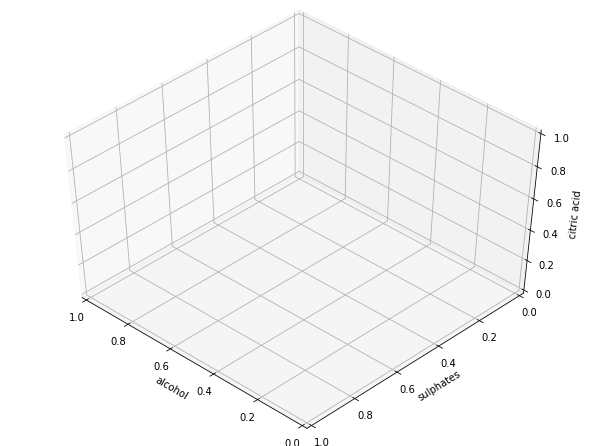

In [29]:
from mpl_toolkits.mplot3d import Axes3D
dim = plt.figure(1, figsize=(8, 6))
ax = Axes3D(dim, rect=[0, 0, 1, 1], elev=48, azim=134)
ax.set_xlabel('alcohol')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')
ax.scatter(x, y, z, c = labels)

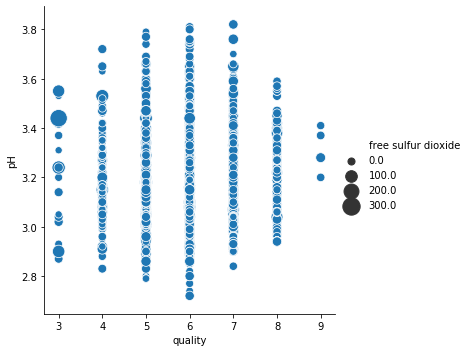

In [8]:
sns.relplot(x="quality", y="pH", size="free sulfur dioxide", sizes=(50,300), data=df)

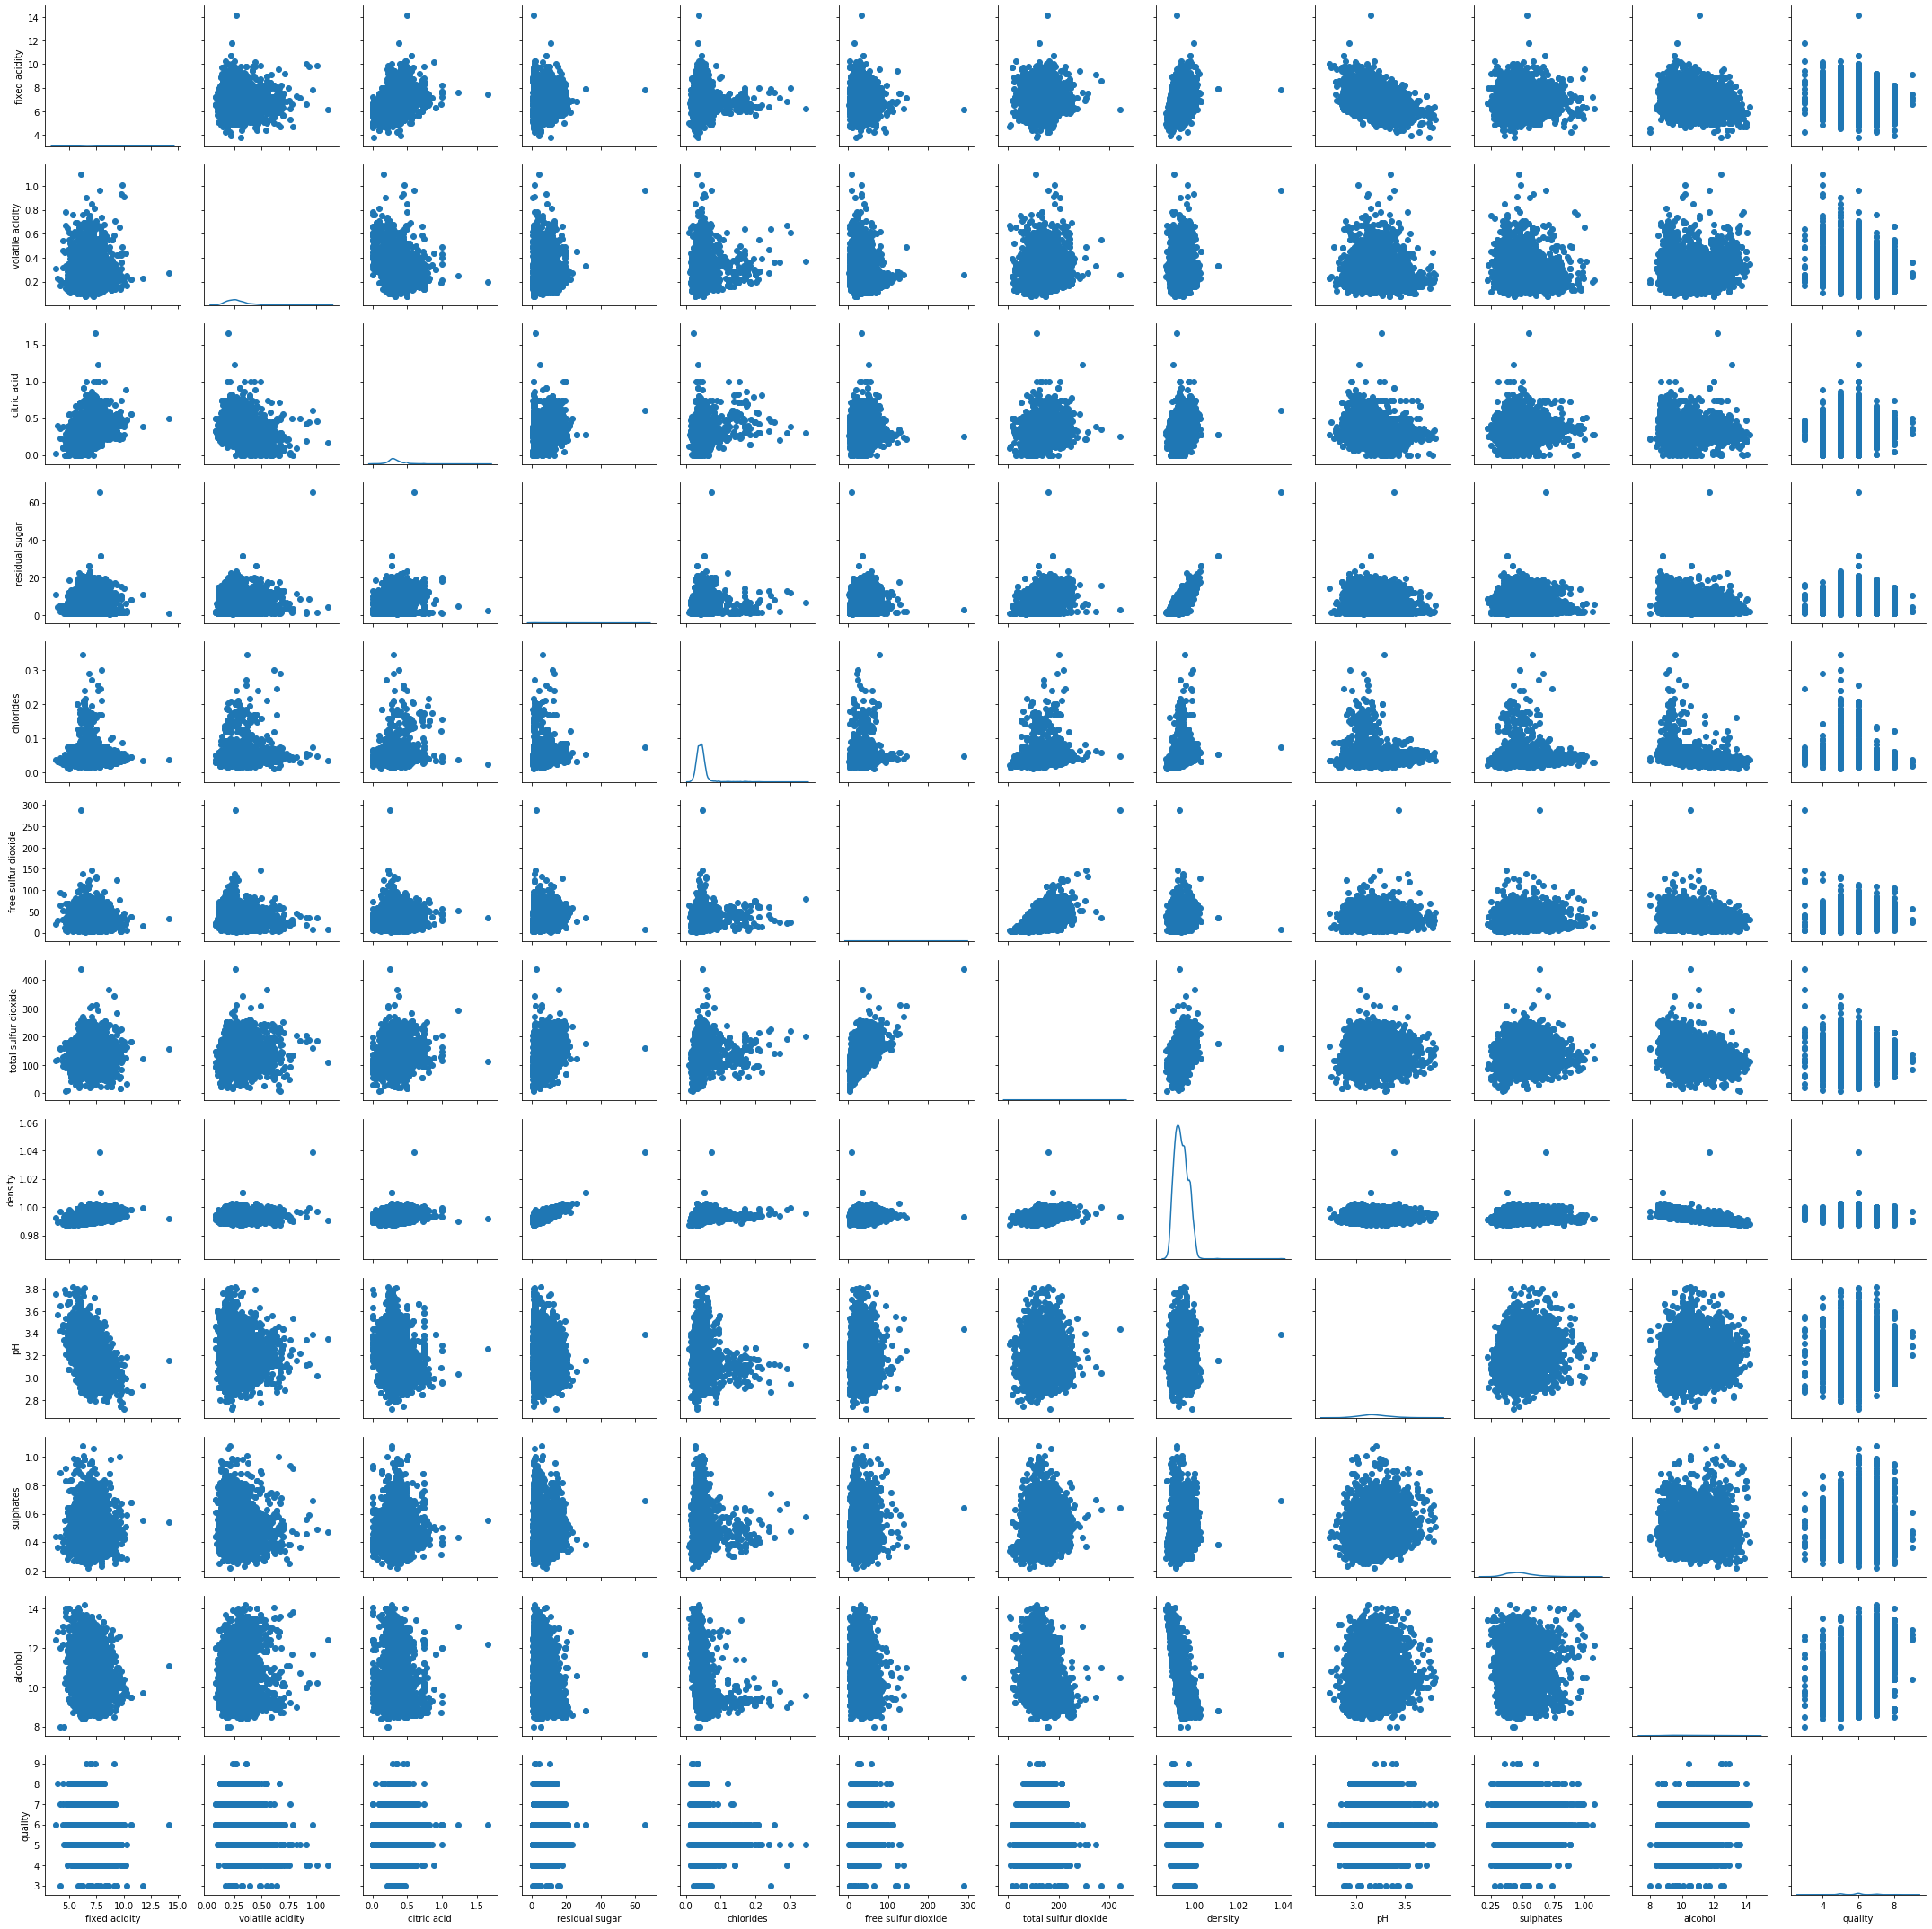

In [6]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter)

In [ ]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df[['quality']]
print(X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

In [ ]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
X = df.drop("quality", axis=1)
y = df["quality"]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual Quality: {y_test[:10].tolist()}")

In [ ]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [ ]:
file2 = "winequality_white.csv"
df2 = pd.read_csv(file2)
df2.head()

In [ ]:
X = df2.drop("quality", axis=1)
y = df2["quality"]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual Quality: {y_test[:10].tolist()}")

In [ ]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [ ]:
classifier.score(X_train)